In [92]:
# from google.colab import files
# files.upload()

In [93]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer ,mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [94]:
abalone =pd.read_csv('abalone.txt',names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [95]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [113]:
abalone.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [96]:
abalone.corr()['Rings'] # 

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [97]:
dsex= pd.get_dummies(abalone['Sex'])
dsex

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
4172,1,0,0
4173,0,0,1
4174,0,0,1
4175,1,0,0


0.5309585632523087

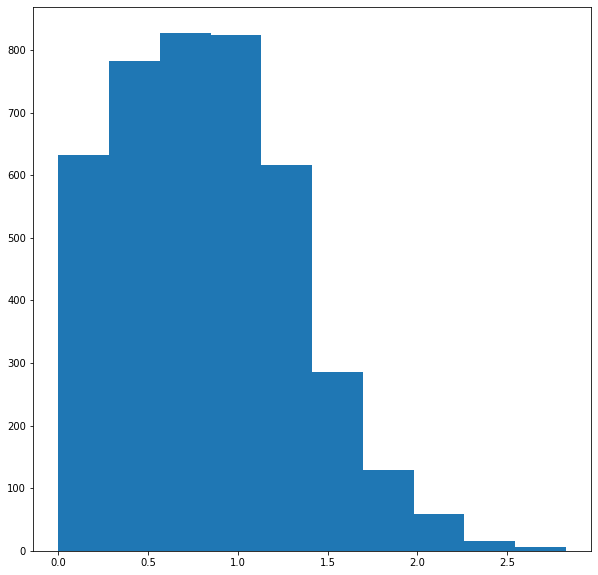

In [98]:
plt.figure(figsize=(10,10))
plt.hist(abalone['Whole weight'])
abalone['Whole weight'].skew()

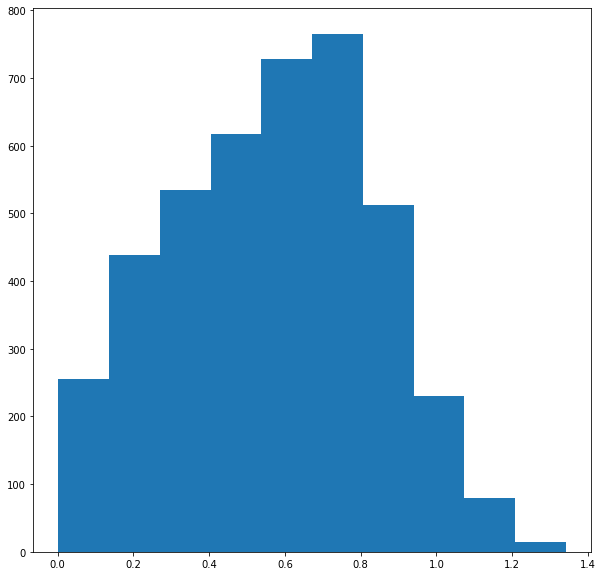

In [99]:
plt.figure(figsize=(10,10))
plt.hist(np.log1p(abalone['Whole weight']))
np.log1p(abalone['Whole weight']).skew()
sab['Whole weight'] =np.log1p(abalone['Whole weight'])

1.114101898355677

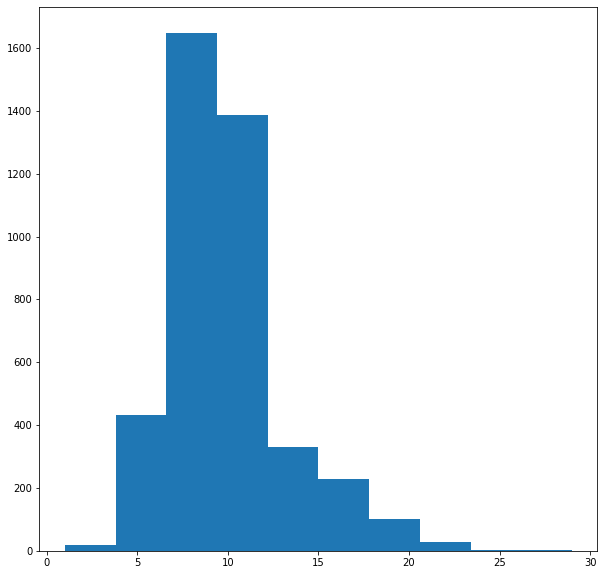

In [100]:
plt.figure(figsize=(10,10))
plt.hist(abalone['Rings'])
abalone['Rings'].skew()

-0.0613173895711796

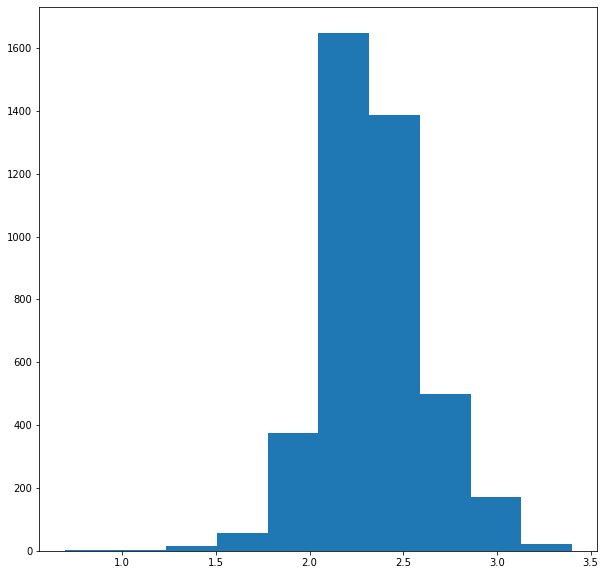

In [101]:
plt.figure(figsize=(10,10))
plt.hist(np.log1p(abalone['Rings']))
np.log1p(abalone['Rings']).skew()

In [102]:
st = StandardScaler()
ab = st.fit_transform(abalone[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']])
sab = pd.DataFrame(ab,columns=['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight'])
sab

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757
...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739


In [103]:
x = pd.concat([sab,dsex],axis=1)
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,0,0,1
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,0,0,1
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,1,0,0
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0,0,1
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,0,1,0


In [104]:
y = np.log1p(abalone['Rings'])
y.head()

0    2.772589
1    2.079442
2    2.302585
3    2.397895
4    2.079442
Name: Rings, dtype: float64

In [105]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 20201005,test_size = 0.3)
score_rmse = make_scorer(mean_squared_error,False)
kfold = KFold(n_splits=10,shuffle=True, random_state=20201005)

In [106]:
# rf = RandomForestRegressor(random_state= 20201005)
# param_range1 = [1000,2000]
# param_range2 = list(range(3,9))

# param_grid = [{'n_estimators':param_range1,'max_depth':param_range2}] 
# gs1 =  GridSearchCV(rfr,param_grid= param_grid,scoring= score_rmse,cv= 10,n_jobs= -1,verbose=True)
# gs1.fit(xtrain,ytrain)


In [107]:
#print(gs1.best_params_)

In [108]:
rfr = RandomForestRegressor(n_estimators= 1000,n_jobs=-1,max_depth= 9,random_state= 20201005)
rfr.fit(xtrain,ytrain)
y_pred = rfr.predict(xtest)
score = np.sqrt(-cross_val_score(rfr,xtrain,ytrain,cv = kfold,scoring =score_rmse) )

In [109]:
print(score)
print(score.mean())

[0.17932104 0.17621776 0.17641416 0.18201513 0.18978141 0.17363248
 0.16579061 0.19520128 0.1716144  0.14865592]
0.17586441791253543


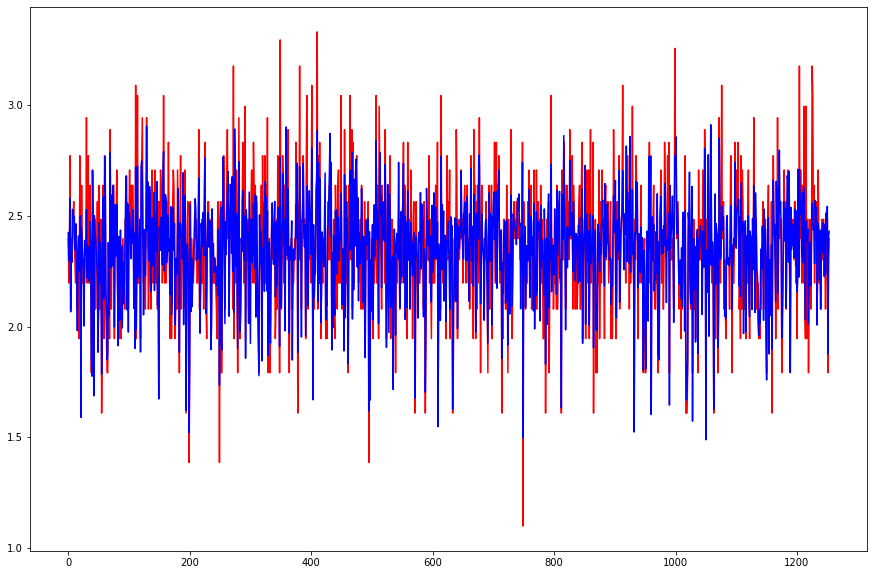

In [110]:
plt.figure(figsize=(15,10))
plt.plot(ytest.values, color='red')
plt.plot(y_pred, color='blue')